Importando todas bibliotecas necessárias para execução do Projeto.

In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2


Importando a Imagem e Padronizando para a base de cinza.

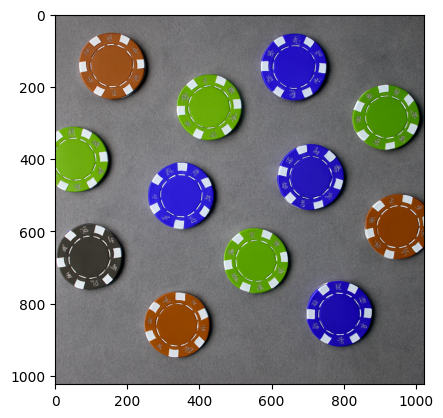

In [61]:
imagem_original = cv2.imread('circulos_1.png')
plt.imshow(imagem_original)

In [62]:
imagem_circulos = cv2.imread('circulos_1.png', cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

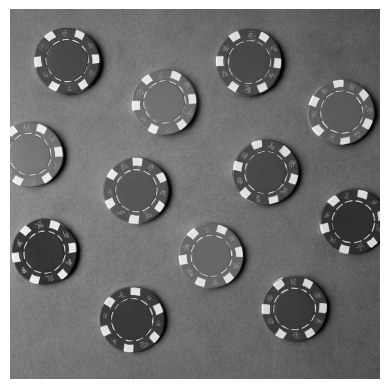

In [63]:
plt.imshow(imagem_circulos, cmap= 'gray')
plt.axis('off')

Copiar a imagem padronizada por boa prática.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

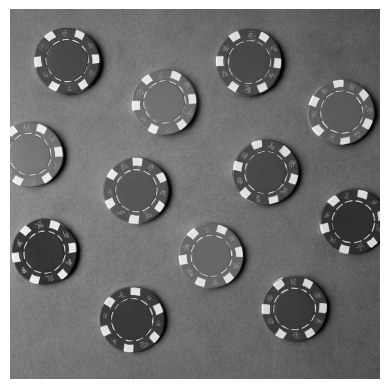

In [64]:
imagem_copia = (imagem_circulos)
plt.imshow(imagem_copia, cmap = 'gray')
plt.axis('off')

Aplicando o filtro da mediana a fim de tratar possíveis ruídos.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

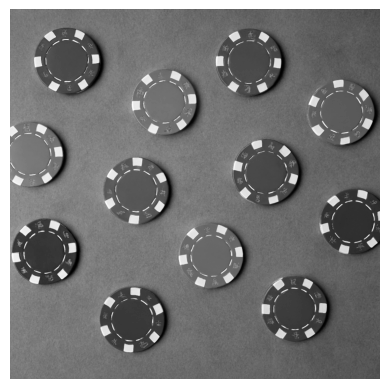

In [65]:
imagem_mediana = cv2.medianBlur(imagem_copia, 3)
plt.imshow(imagem_mediana, cmap = 'gray')
plt.axis('off')

Manipulando bordas da imagem com tratamento da Mediana

In [66]:
sobel_x = cv2.Sobel(imagem_mediana, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(imagem_mediana, cv2.CV_64F, 0, 1, ksize=5)

In [67]:
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

In [68]:
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255,
cv2.NORM_MINMAX)
sobel_magnitude = sobel_magnitude.astype(np.uint8)

Binarização das Bordas em Sobel

In [69]:
_, sobel_binarizar = cv2.threshold(sobel_magnitude, 70, 255,
cv2.THRESH_BINARY)

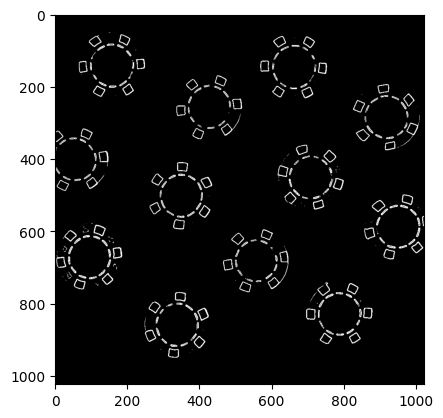

In [70]:
plt.imshow(sobel_binarizar, cmap= 'gray')



Identificar Circulos com o HOUGH CIRCLES

In [71]:
circulos = cv2.HoughCircles(sobel_binarizar, cv2.HOUGH_GRADIENT, dp=1.1, minDist=100, param1=100, param2=40, minRadius=25, maxRadius=90)
print(circulos)

[[[337.15     859.65      59.32    ]
  [660.55     146.85      60.2     ]
  [917.95     286.55002   58.88    ]
  [787.05     831.05      56.020004]
  [347.05002  502.15002   56.129997]
  [557.15     682.55      58.88    ]
  [ 94.05     673.75      58.22    ]
  [945.45     594.55      62.73    ]
  [154.55     143.55      58.88    ]
  [428.45     253.55      57.34    ]
  [715.55     450.45      62.620003]
  [ 54.45     396.55002   63.72    ]]]


Text(0.5, 1.0, 'Total de círculos encontrados: 12')

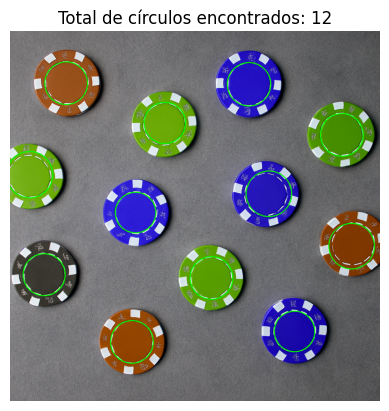

In [72]:
circulos = np.uint16(np.around(circulos))
circulos_imagem = imagem_original.copy()
for i in circulos[0,:]:
    # draw the outer circle
    cv2.circle(circulos_imagem,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    # cv2.circle(circulos_imagem,(i[0],i[1]),2,(255,0,0),10)
    
plt.imshow(circulos_imagem, cmap= 'gray')
plt.axis('off')
plt.title(f'Total de círculos encontrados: {total_circulos}')

Contagem dos Circulos contornados

In [73]:
if circulos is not None:
    total_circulos = circulos.shape[1]
    print(f'Total de círculos detectados: {total_circulos}')
else:
    total_circulos = 0
    print('Nenhum círculo detectado.')


Total de círculos detectados: 12
